# Artificial Neural Nets (ANN)

In [2]:
from tensorflow import keras # import deep learning libraries
from tensorflow.keras import layers 

Loading data

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() 

In [4]:
X_train.shape, X_test.shape # 28 * 28 pixel with 1 (greyscale)

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train[51]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         46, 105, 254, 254, 254, 254, 255, 239,  41,   0,   0,   0,   0,
          0,   0],
       [  

Display Number

In [6]:
import matplotlib.pyplot as plt

In [7]:
def number(index):
    plt.imshow(X_train[index])
    print("---" * 15)
    print(f"The number is {y_train[index]}")
    print("---" * 15)

---------------------------------------------
The number is 8
---------------------------------------------


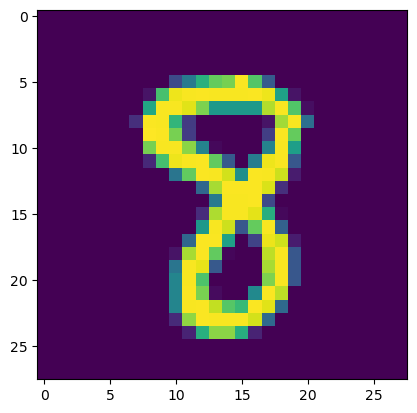

In [8]:
import random
index = random.randrange(0, 60000)
number(index)

Converting data

Flatten Image (28 * 28) pixels to 784 element array

In [9]:
X_train = X_train.reshape(len(X_train), 28 * 28)
X_test = X_test.reshape(len(X_test), 28 * 28)

In [10]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Feature Scaling

In [12]:
X_train = X_train / 255
X_test = X_test / 255

Neural Network 1

In [13]:
from tensorflow.keras.models import Model

In [17]:
i = layers.Input(shape=(784,))
x = layers.Dense(10, activation="sigmoid")(i)

model = Model(i, x)

In [12]:
# model = keras.Sequential([
#     layers.Dense(10, activation="sigmoid", input_shape=(784, ))
# ])

In [18]:
model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy", 
    metrics="accuracy")

In [19]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.4675 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2726 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9255


Test Prediction

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 923us/step - loss: 0.2664 - accuracy: 0.9253


[0.26644283533096313, 0.9253000020980835]

In [21]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 594us/step


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [23]:
predictions = [value.argmax() for value in predictions]

<Axes: >

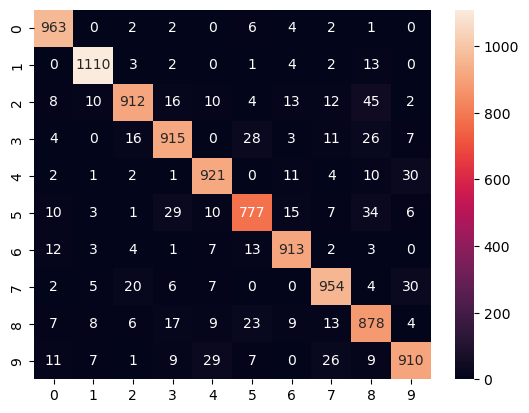

In [24]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.92      0.91      0.91      1010
           4       0.93      0.94      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.92      0.93      0.93      1028
           8       0.86      0.90      0.88       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



Neural Network 2

In [26]:
i = layers.Input(shape=(784,))

x = layers.Dense(64, activation="relu")(i)
x = layers.Dense(10, activation="softmax")(x)

model = Model(i, x)

In [21]:
# model = keras.Sequential([
#     layers.Dense(64, activation="relu", input_shape=(784, )),
#     layers.Dense(10, activation="softmax")
# ])

TensorBoard

In [27]:
tensorboard = keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [28]:
model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy", 
    metrics="accuracy")

In [29]:
model.fit(X_train, y_train, epochs=5, callbacks=[tensorboard])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3114 - accuracy: 0.9107
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1507 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0688 - accuracy: 0.9796


Test Prediction

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9719


[0.09376635402441025, 0.9718999862670898]

In [31]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [32]:
predictions = [value.argmax() for value in predictions]

<Axes: >

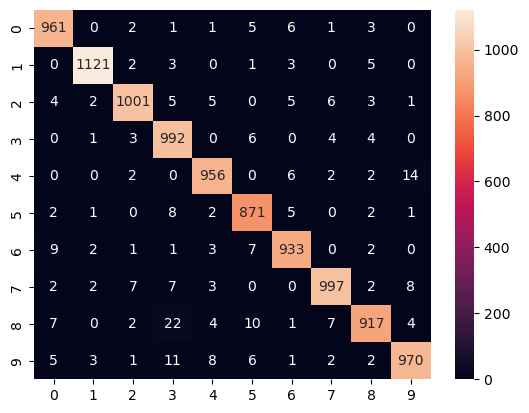

In [33]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.98      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.94      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



CNN

In [35]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [36]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Data Split

In [37]:
# Reserve 10,000 samples for validation
# X_val = X_train[-5000:]
# y_val = y_train[-5000:]


X_train = X_train[:-5000]
y_train = y_train[:-5000]


In [39]:
i = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation="relu")(i)
x = layers.MaxPool2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPool2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10, activation="softmax")(x)

model = Model(i, x)

In [49]:
# model = keras.Sequential([
    
#     layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
#     layers.MaxPool2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation="relu"),
#     layers.MaxPool2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

TensorBoard

In [40]:
tensorboard = keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [43]:
model.compile(
    # optimizer="rmsprop", 
    optimizer="adam", 
    loss="sparse_categorical_crossentropy", 
    metrics="accuracy")

In [44]:
model.fit(X_train, y_train, epochs=10, callbacks=[tensorboard])
# model.fit(X_train, y_train, epochs=10, bvalidation_data=(X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 58s 33ms/step - loss: 0.0473 - accuracy: 0.9907
Epoch 2/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.0390 - accuracy: 0.9907
Epoch 3/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.0325 - accuracy: 0.9917
Epoch 4/10
1719/1719 [==============================] - 46s 27ms/step - loss: 0.0271 - accuracy: 0.9930
Epoch 5/10
1719/1719 [==============================] - 46s 27ms/step - loss: 0.0235 - accuracy: 0.9939
Epoch 6/10
1719/1719 [==============================] - 47s 28ms/step - loss: 0.0271 - accuracy: 0.9936
Epoch 7/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.0182 - accuracy: 0.9955
Epoch 8/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.0224 - accuracy: 0.9950
Epoch 9/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.0195 - accuracy: 0.9955
Epoch 10/10
1719/1719 [==============================] - 45s 26m

Test Prediction

In [45]:
model.evaluate(X_test, y_test)
# model.evaluate(X_val, y_val)

313/313 [==============================] - 2s 6ms/step - loss: 0.1104 - accuracy: 0.9841


[0.1103968471288681, 0.9840999841690063]

In [46]:
predictions = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [47]:
predictions = [value.argmax() for value in predictions]

<Axes: >

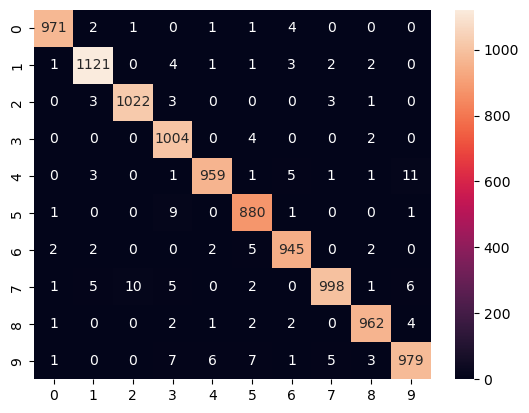

In [48]:
# sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

